## Dataset Description - IMDB Movie Reviews

The dataset used for this project consists of IMDB movie reviews and their corresponding sentiment labels (positive or negative). The dataset is loaded from a CSV file and contains the following columns:
I. Review: The text of the review.
II. Sentiment: The sentiment label of the review (positive or negative).

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
data = pd.read_csv("D:\Github-Projects\IMDB+Dataset.csv")

In [3]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [5]:
data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

## Data Preprocessing

In [6]:
from bs4 import BeautifulSoup
import re

In [7]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
data['review']=data['review'].apply(denoise_text)

C:\Users\anava\AppData\Local\Temp\ipykernel_1860\2541828693.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [8]:
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
data['review']=data['review'].apply(remove_special_characters)

In [9]:
from sklearn.preprocessing import LabelBinarizer

In [10]:
lb=LabelBinarizer()
data['sentiment']=lb.fit_transform(data['sentiment'])

## Splitting Data into Training and Test Sets

In [11]:
train_sentiment=data.sentiment[:40000]
train_review=data.review[:40000]
test_sentiment=data.sentiment[40000:]
test_review=data.review[40000:]

## Feature Extraction

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [13]:
tf_vec=TfidfVectorizer(min_df=20,max_df=0.5,ngram_range=(1,2))

In [14]:
cv_train_review=tf_vec.fit_transform(train_review)
cv_test_review=tf_vec.transform(test_review)

In [15]:
#print(tf_vec.get_feature_names())

In [16]:
cv_train_review.shape,cv_test_review.shape

((40000, 60356), (10000, 60356))

## Model Training



In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr=LogisticRegression()

In [19]:
model=lr.fit(cv_train_review,train_sentiment)

In [20]:
model.score(cv_train_review,train_sentiment)

0.9455

In [21]:
model.score(cv_test_review,test_sentiment)

0.9032

In [22]:
pred=model.predict(cv_test_review)

In [24]:
act=test_sentiment

## Model Evaluation

In [23]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import matplotlib.pyplot as plt

In [25]:
from sklearn.metrics import confusion_matrix

# Generating confusion matrix
conf_matrix = confusion_matrix(act, pred)

# Extracting values from confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Calculating precision
precision = TP / (TP + FP)

# Calculating recall
recall = TP / (TP + FN)

# Printing precision and recall
print("Precision:", precision)
print("Recall:", recall)


Precision: 0.8987166831194472
Recall: 0.9091272218893549


In [25]:
confusion_matrix(act,pred)

array([[4480,  513],
       [ 455, 4552]], dtype=int64)

In [26]:
accuracy_score(act,pred)

0.9032

In [27]:
print(classification_report(act,pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      4993
           1       0.90      0.91      0.90      5007

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



## Top Features


In [28]:
# Corrected code using get_feature_names_out() instead of get_feature_names()
# Creating dictionary of features and coefficients
feature_to_coef = {
    word: coef for word, coef in zip(
        tf_vec.get_feature_names_out(), model.coef_[0]
    )
}

# Get the top 5 positive features (highest coefficients)
for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True
)[:5]:
    print("Positive:", best_positive)

# Get the top 5 negative features (lowest coefficients)
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1]
)[:5]:
    print("Negative:", best_negative)

Positive: ('great', 8.447827462988238)
Positive: ('excellent', 6.372000036521031)
Positive: ('perfect', 5.101750438383319)
Positive: ('wonderful', 5.088939354771363)
Positive: ('the best', 4.497881738975893)
Negative: ('bad', -9.241920985103215)
Negative: ('worst', -8.438329243499775)
Negative: ('awful', -7.044491020947995)
Negative: ('the worst', -6.724905796602992)
Negative: ('boring', -6.346467970383901)


## User Input Prediction



In [29]:
# 1. Accept input from the user
user_input = input("Enter your review: ")

# 2. Preprocess the input data
user_input = denoise_text(user_input)
user_input = remove_special_characters(user_input)

# 3. Transform the preprocessed input using the trained TfidfVectorizer
user_input_transformed = tf_vec.transform([user_input])

# 4. Use the trained model to predict the sentiment of the input
prediction = model.predict(user_input_transformed)

# 5. Output the result
if prediction[0] == 1:
    print("Positive review!")
else:
    print("Negative review.")


Positive review!


## Displaying Reviews



In [37]:
# Corrected code using get_feature_names_out() instead of get_feature_names()
feature_to_coef = {
    word: coef for word, coef in zip(
        tf_vec.get_feature_names_out(), model.coef_[0]
    )
}

# Ask the user whether they want positive or negative reviews
user_choice = input("Enter 'positive' or 'negative' to see top features: ")

# Print the top 5 positive features (highest coefficients)
if user_choice.lower() == 'positive':
    print("Top 5 Positive Features:")
    for best_positive in sorted(
        feature_to_coef.items(), 
        key=lambda x: x[1], 
        reverse=True
    )[:5]:
        print(best_positive)
# Print the top 5 negative features (lowest coefficients)
elif user_choice.lower() == 'negative':
    print("Top 5 Negative Features:")
    for best_negative in sorted(
        feature_to_coef.items(), 
        key=lambda x: x[1]
    )[:5]:
        print(best_negative)
else:
    print("Invalid choice. Please enter 'positive' or 'negative'.")


Top 5 Positive Features:
('great', 8.447827462988238)
('excellent', 6.372000036521031)
('perfect', 5.101750438383319)
('wonderful', 5.088939354771363)
('the best', 4.497881738975893)


In [30]:
# Ask the user whether they want positive or negative reviews
user_choice = input("Enter 'positive' or 'negative' to see reviews: ")

# Define a counter to limit the number of reviews printed
num_reviews_printed = 0
max_reviews_to_print = 10  # You can adjust this as needed

# Print all positive reviews
if user_choice.lower() == 'positive':
    print("Positive Reviews:")
    for review, sentiment in zip(test_review, act):
        if sentiment == 1:
            print(review)
            print()
            num_reviews_printed += 1
            if num_reviews_printed >= max_reviews_to_print:
                break
# Print all negative reviews
elif user_choice.lower() == 'negative':
    print("Negative Reviews:")
    for review, sentiment in zip(test_review, act):
        if sentiment == 0:
            print(review)
            print()
            num_reviews_printed += 1
            if num_reviews_printed >= max_reviews_to_print:
                break
else:
    print("Invalid choice. Please enter 'positive' or 'negative'.")


Invalid choice. Please enter 'positive' or 'negative'.


In [31]:
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:5]:
    print (best_negative)
    

('bad', -9.241920985103215)
('worst', -8.438329243499775)
('awful', -7.044491020947995)
('the worst', -6.724905796602992)
('boring', -6.346467970383901)


## Word Cloud Visualization


In [32]:
pos_words=''
for best_positive in sorted(feature_to_coef.items(), key=lambda x: x[1], reverse=True)[:100]:
    pos_words=pos_words+ str(best_positive)
    

In [33]:
neg_words=''
for best_negative in sorted(feature_to_coef.items(), key=lambda x: x[1])[:100]:
    neg_words=neg_words+ str(best_negative)

In [34]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

## Positive word cloud


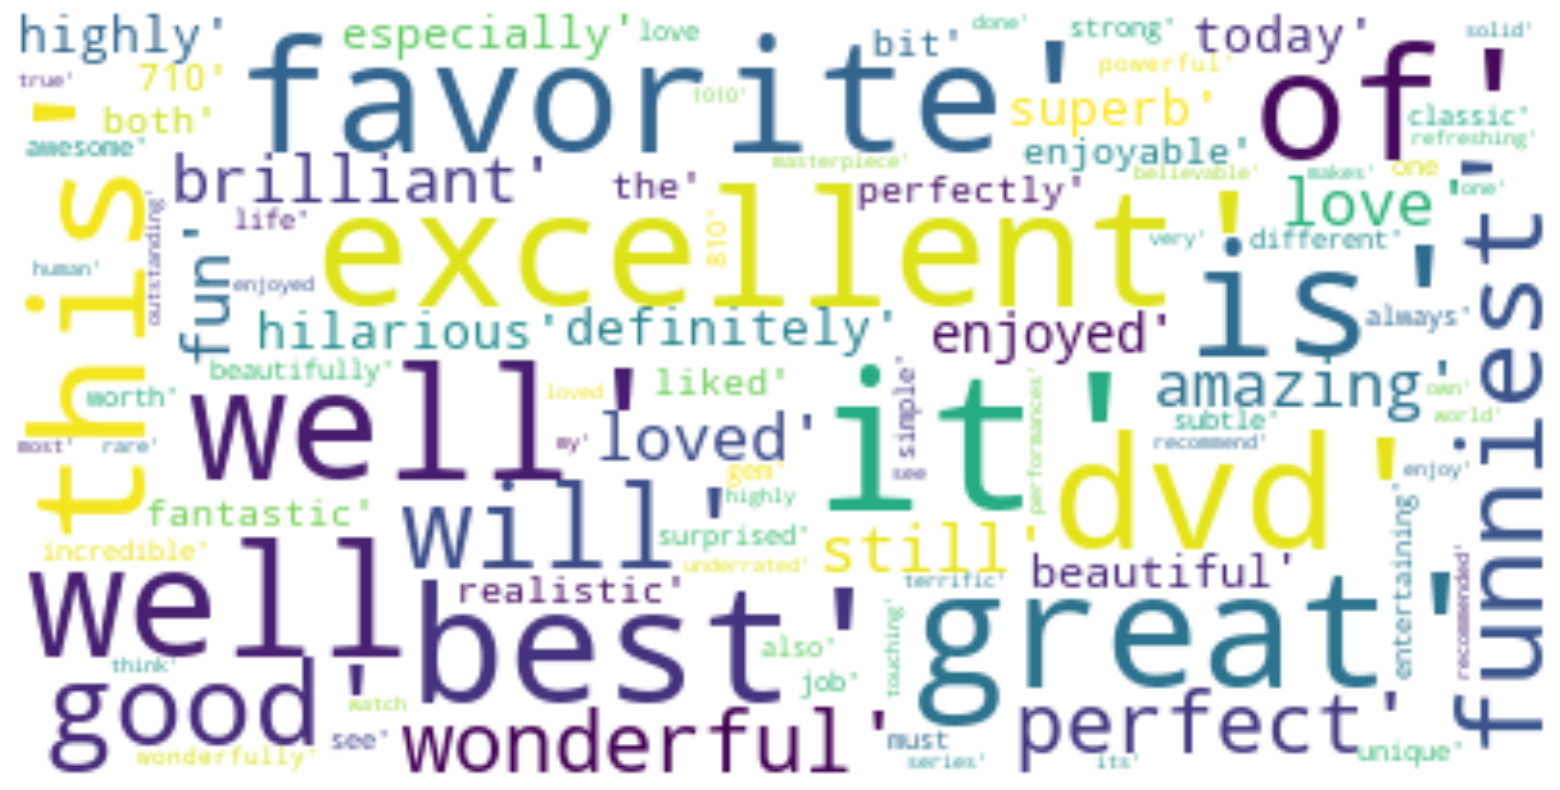

In [35]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(pos_words)

# Display the generated image:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Negative word cloud

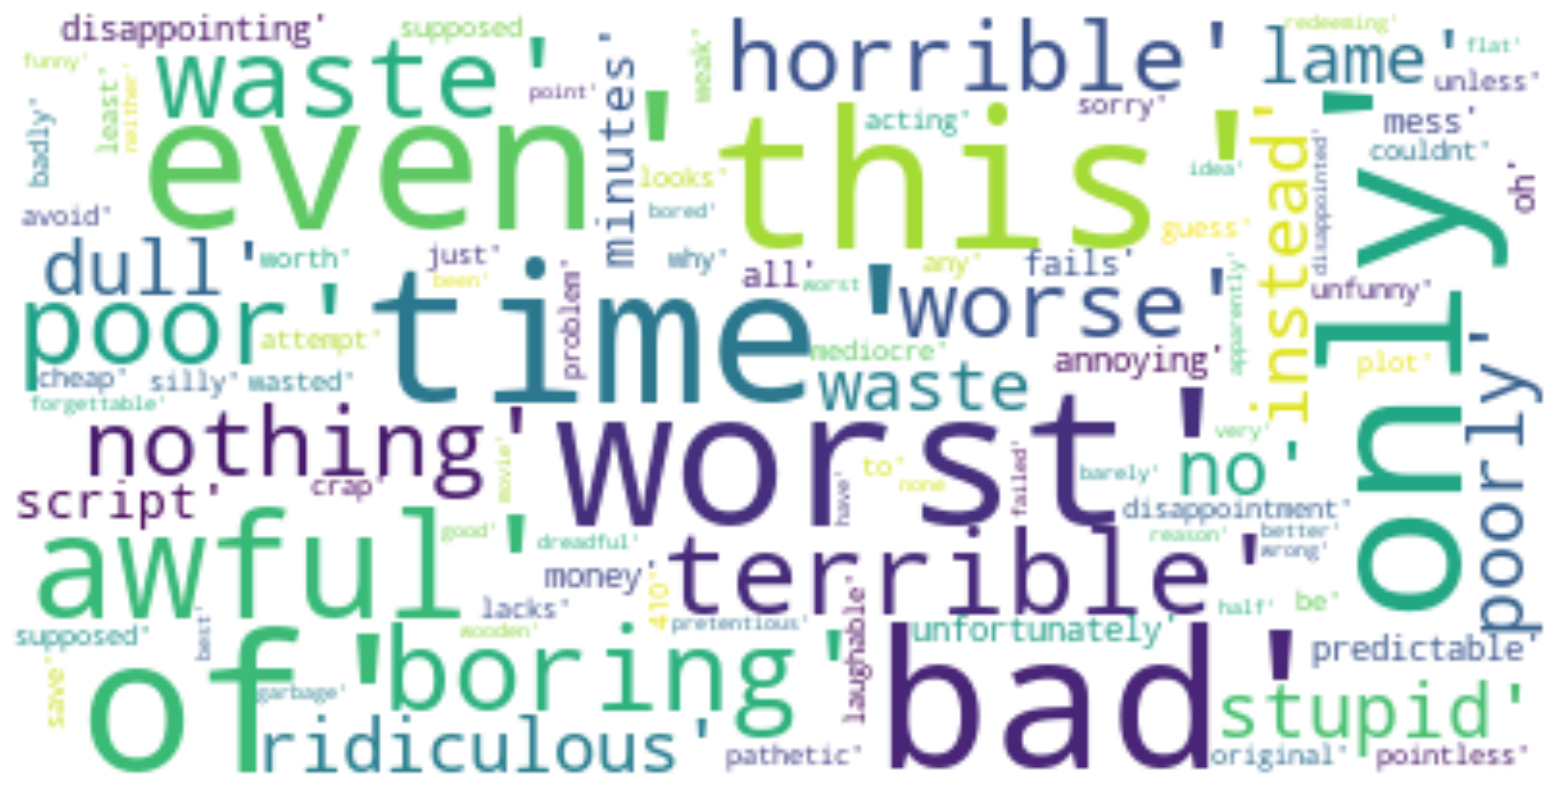

In [36]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(neg_words)

# Display the generated image:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()